In [129]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

Original image shape: (300, 451, 3)


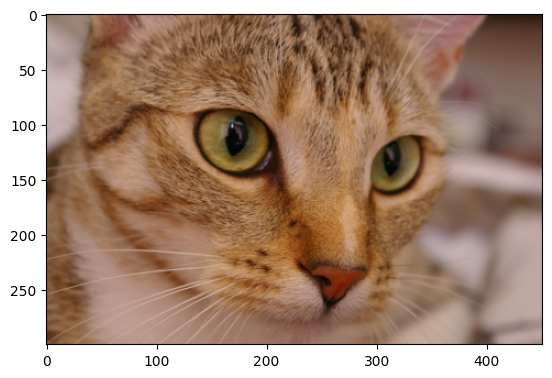

In [130]:
# Load image from "chelsea"
img = data.chelsea()

# Print shape of original image
print("Original image shape:", img.shape)

plt.imshow(img)

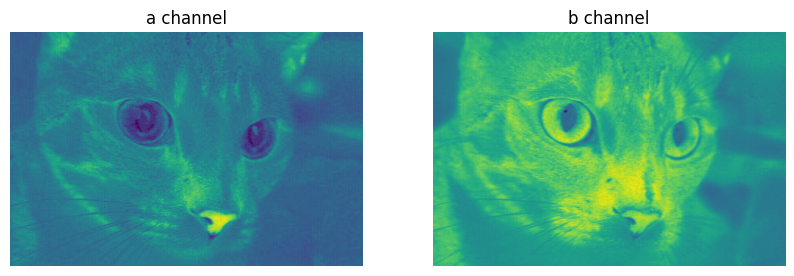

In [131]:
# Convert image to LAB color space
imgLab = color.rgb2lab(img)

# Flatten a and b channels of image array to a 2D array
imgFlatAB = imgLab[:,:,1:].reshape(-1, 2)

# Subtract mean of each feature (a and b channels) from image data
imgMeanAB = np.mean(imgFlatAB, axis=0)
imgFlatCenteredAB = imgFlatAB - imgMeanAB

# Reshape a and b channels to their original dimensions
imgA = imgFlatCenteredAB[:,0].reshape(imgLab[:,:,1].shape)
imgB = imgFlatCenteredAB[:,1].reshape(imgLab[:,:,2].shape)

# Display a and b channels in viridis colormap
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(imgA, cmap='viridis')
axs[0].set_title("a channel")
axs[0].axis("off")

axs[1].imshow(imgB, cmap='viridis')
axs[1].set_title("b channel")
axs[1].axis("off")
plt.show()

In [132]:
# Calculate covariance matrix of centered image data
cov = np.cov(imgFlatCenteredAB.T)
print("Covariance Matrix:\n", cov)

Covariance Matrix:
 [[17.77260958 23.53231872]
 [23.53231872 82.72308446]]


In [133]:
# Calculate eigenvalues and eigenvectors of covariance matrix
eigvals, eigvecs = np.linalg.eigh(cov)
print("Eigenvalues:\n", eigvals)
print("Eigenvectors:\n", eigvecs)

# Sort eigenvalues in decreasing order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
print("Sorted Eigenvalues in decreasing order:\n", eigvals)

Eigenvalues:
 [10.14284644 90.3528476 ]
Eigenvectors:
 [[-0.95125058  0.3084191 ]
 [ 0.3084191   0.95125058]]
Sorted Eigenvalues in decreasing order:
 [90.3528476  10.14284644]


In [134]:
# Determine number of principal components to use
total_var = np.sum(eigvals)
var = 0
n_components = 0
for i in range(len(eigvals)):
    var += eigvals[i]
    if var/total_var >= 0.9:
        n_components = i+1
        break

print("Number of principal components used:", n_components)

Number of principal components used: 2


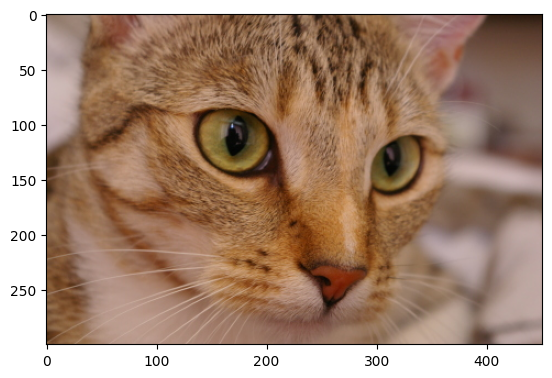

In [135]:
# Project centered image data onto principal components
proj = np.dot(imgFlatCenteredAB, eigvecs[:,:n_components])

# Reconstruct compressed image using principal components and mean
imgReconstructed = np.dot(proj, eigvecs[:,:n_components].T) + imgMeanAB

# Reshape reconstructed image array to original LAB image dimensions
imgCompressedLab = np.zeros_like(imgLab)
imgCompressedLab[:,:,0] = imgLab[:,:,0]
imgCompressedLab[:,:,1:] = imgReconstructed.reshape(imgLab[:,:,1:].shape)

# Convert compressed LAB image back to RGB color space
imgCompressed = color.lab2rgb(imgCompressedLab)

plt.imshow(imgCompressed)

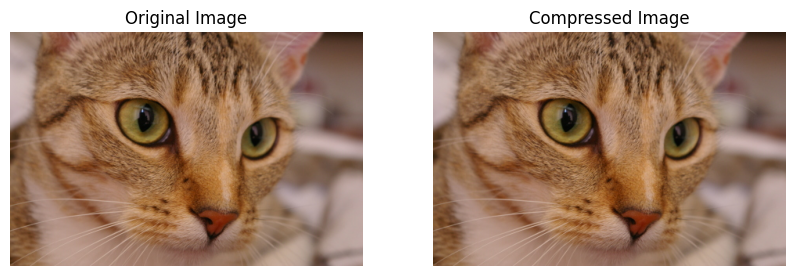

In [136]:
# Set up figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image on left subplot
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Plot compressed image on right subplot
axs[1].imshow(imgCompressed)
axs[1].set_title("Compressed Image")
axs[1].axis("off")

# Show figure
plt.show()